In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

<h1> Raw Text

In [2]:
text = pd.read_csv('df_text_predictions.csv', header=0)
text

,Unnamed: 0,text,label,cleaned_text,stem,pred,pred_opi
0,0,"Mmmm yes, forward thinking, like underground t...",-1,mmmm yes forward thinking like underground tub...,mmmm ye forward think like underground tube ca...,0,1
1,1,Probably not. It's like if attaching horse to ...,0,probably like attaching horse automobile would...,probabl like attach hors automobil would save ...,0,na
2,2,Cool in any decade ever! A rocket going to spa...,1,cool decade ever rocket going space come would...,cool decad ever rocket go space come would imp...,1,1
3,3,"He is on of the most famous people out there, ...",1,famous people like steve jobs never used among...,famou peopl like steve job never use among peo...,1,1
4,4,The **average** rent for an apartment in Los A...,1,average rent apartment los angeles 2786 month ...,averag rent apart lo angel 2786 month tesla lo...,1,0
...,...,...,...,...,...,...,...
998,595,@elonmusk Finish Neuralink so humans can compete.,0,elonmusk finish neuralink humans compete,elonmusk finish neuralink human compet,0,na
999,596,"I hated every minute of training, but I said, ...",1,hated every minute training said dont quit suf...,hate everi minut train said dont quit suffer l...,1,1
1000,597,Wth is this @elonmusk 😭😭 https://t.co/hbXL3WZpMf,-1,wth elonmusk loudlycryingface loudlycryingface,wth elonmusk loudlycryingfac loudlycryingfac,0,1
1001,598,@DerpyMudkip02 @DasNaga1 @JoeBiden @MichelleOb...,0,derpymudkip02 dasnaga1 joebiden michelleobama ...,derpymudkip02 dasnaga1 joebiden michelleobama ...,0,na


In [3]:
y_true = text.copy()
y_true['label'] = y_true['label'].replace([-1, 1], 1)

y_true = y_true["label"].to_numpy()
y_true

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [4]:
y_pred = text['pred'].to_numpy()
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [5]:
report_lr = precision_recall_fscore_support(y_true, y_pred, average='binary')
print ("\nprecision = %0.4f, recall = %0.4f, F1 = %0.4f, accuracy = %0.4f\n" % \
           (report_lr[0], report_lr[1], report_lr[2], accuracy_score(y_true, y_pred)))


precision = 0.6000, recall = 0.4854, F1 = 0.5366, accuracy = 0.5713



<h3> Opiniated

In [13]:
y_true = text.copy()
#y_true['label'] = y_true['label'].replace([-1], 2)
y_true = y_true["label"].to_numpy()
y_true = y_true[y_true != 0]
y_true[y_true == -1] = 0

In [14]:
y_pred = text.copy()
y_pred = y_pred["pred_opi"].to_numpy()
y_pred = y_pred[y_pred != 'na']
y_pred = y_pred.astype(np.int)
y_pred

C:\Users\Trevor\AppData\Local\Temp\ipykernel_3004\2928068629.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = y_pred.astype(np.int)


array([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,

In [15]:
report_lr = precision_recall_fscore_support(y_true, y_pred, average='binary')
print ("\nprecision = %0.4f, recall = %0.4f, F1 = %0.4f, accuracy = %0.4f\n" % \
           (report_lr[0], report_lr[1], report_lr[2], accuracy_score(y_true, y_pred)))


precision = 0.4824, recall = 0.7056, F1 = 0.5731, accuracy = 0.5614



<h1> Cleaned text

In [16]:
text = pd.read_csv('df_cleaned_text_predictions.csv', header=0)
y_true = text.copy()
y_true['label'] = y_true['label'].replace([-1, 1], 1)
y_true = y_true["label"].to_numpy()
y_pred = text['pred'].to_numpy()
precision_recall_fscore_support(y_true, y_pred)
report_lr = precision_recall_fscore_support(y_true, y_pred, average='binary')
print ("\nprecision = %0.4f, recall = %0.4f, F1 = %0.4f, accuracy = %0.4f\n" % \
           (report_lr[0], report_lr[1], report_lr[2], accuracy_score(y_true, y_pred)))


precision = 0.6294, recall = 0.5595, F1 = 0.5924, accuracy = 0.6062



<h3> Opiniated

In [17]:
y_true = text.copy()
#y_true['label'] = y_true['label'].replace([-1], 2)
y_true = y_true["label"].to_numpy()
y_true = y_true[y_true != 0]
y_true[y_true == -1] = 0
#y_true
y_pred = text.copy()
y_pred = y_pred["pred_opi"].to_numpy()
y_pred = y_pred[y_pred != 'na']
y_pred = y_pred.astype(np.int)
#y_pred
report_lr = precision_recall_fscore_support(y_true, y_pred, average='binary')
print ("\nprecision = %0.4f, recall = %0.4f, F1 = %0.4f, accuracy = %0.4f\n" % \
           (report_lr[0], report_lr[1], report_lr[2], accuracy_score(y_true, y_pred)))


precision = 0.5174, recall = 0.6963, F1 = 0.5936, accuracy = 0.6023



C:\Users\Trevor\AppData\Local\Temp\ipykernel_3004\3531696895.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = y_pred.astype(np.int)


<h1> Stemmed text

In [18]:
text = pd.read_csv('df_stemmed_text_predictions.csv', header=0)
y_true = text.copy()
y_true['label'] = y_true['label'].replace([-1, 1], 1)
y_true = y_true["label"].to_numpy()
y_pred = text['pred'].to_numpy()
precision_recall_fscore_support(y_true, y_pred)
report_lr = precision_recall_fscore_support(y_true, y_pred, average='binary')
print ("\nprecision = %0.4f, recall = %0.4f, F1 = %0.4f, accuracy = %0.4f\n" % \
           (report_lr[0], report_lr[1], report_lr[2], accuracy_score(y_true, y_pred)))


precision = 0.6186, recall = 0.6862, F1 = 0.6506, accuracy = 0.6231



<h3> Opiniated

In [19]:
y_true = text.copy()
#y_true['label'] = y_true['label'].replace([-1], 2)
y_true = y_true["label"].to_numpy()
y_true = y_true[y_true != 0]
y_true[y_true == -1] = 0
#y_true
y_pred = text.copy()
y_pred = y_pred["pred_opi"].to_numpy()
y_pred = y_pred[y_pred != 'na']
y_pred = y_pred.astype(np.int)
#y_pred
report_lr = precision_recall_fscore_support(y_true, y_pred, average='binary')
print ("\nprecision = %0.4f, recall = %0.4f, F1 = %0.4f, accuracy = %0.4f\n" % \
           (report_lr[0], report_lr[1], report_lr[2], accuracy_score(y_true, y_pred)))


precision = 0.5362, recall = 0.6916, F1 = 0.6041, accuracy = 0.6218



C:\Users\Trevor\AppData\Local\Temp\ipykernel_3004\3531696895.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = y_pred.astype(np.int)


In [20]:
text

,Unnamed: 0,text,label,cleaned_text,stem,pred,pred_opi
0,0,"Mmmm yes, forward thinking, like underground t...",-1,mmmm yes forward thinking like underground tub...,mmmm ye forward think like underground tube ca...,0,0
1,1,Probably not. It's like if attaching horse to ...,0,probably like attaching horse automobile would...,probabl like attach hors automobil would save ...,1,na
2,2,Cool in any decade ever! A rocket going to spa...,1,cool decade ever rocket going space come would...,cool decad ever rocket go space come would imp...,1,1
3,3,"He is on of the most famous people out there, ...",1,famous people like steve jobs never used among...,famou peopl like steve job never use among peo...,1,1
4,4,The **average** rent for an apartment in Los A...,1,average rent apartment los angeles 2786 month ...,averag rent apart lo angel 2786 month tesla lo...,1,0
...,...,...,...,...,...,...,...
998,595,@elonmusk Finish Neuralink so humans can compete.,0,elonmusk finish neuralink humans compete,elonmusk finish neuralink human compet,0,na
999,596,"I hated every minute of training, but I said, ...",1,hated every minute training said dont quit suf...,hate everi minut train said dont quit suffer l...,1,1
1000,597,Wth is this @elonmusk 😭😭 https://t.co/hbXL3WZpMf,-1,wth elonmusk loudlycryingface loudlycryingface,wth elonmusk loudlycryingfac loudlycryingfac,0,1
1001,598,@DerpyMudkip02 @DasNaga1 @JoeBiden @MichelleOb...,0,derpymudkip02 dasnaga1 joebiden michelleobama ...,derpymudkip02 dasnaga1 joebiden michelleobama ...,0,na


In [22]:
df_pos = text.loc[text['label'] == 1]
df_pos

,Unnamed: 0,text,label,cleaned_text,stem,pred,pred_opi
2,2,Cool in any decade ever! A rocket going to spa...,1,cool decade ever rocket going space come would...,cool decad ever rocket go space come would imp...,1,1
3,3,"He is on of the most famous people out there, ...",1,famous people like steve jobs never used among...,famou peopl like steve job never use among peo...,1,1
4,4,The **average** rent for an apartment in Los A...,1,average rent apartment los angeles 2786 month ...,averag rent apart lo angel 2786 month tesla lo...,1,0
7,7,To the moon!!,1,moon,moon,0,1
8,8,"WTF would he know? Well, ""Elon R. Musk^6"" is a...",1,wtf would know well elon r musk6 author along ...,wtf would know well elon r musk6 author along ...,1,1
...,...,...,...,...,...,...,...
980,577,Retweeting for visibility because Andrew tradi...,1,retweeting visibility andrew trading 28000 ft ...,retweet visibl andrew trade 28000 ft would awe...,0,1
985,582,@Itwasjustameme @elonmusk please do tell us th...,1,itwasjustameme elonmusk please tell us details,itwasjustamem elonmusk pleas tell us detail,0,0
988,585,@elonmusk @Teslaconomics Make it desirable. We...,1,elonmusk teslaconomics make desirable weve see...,elonmusk teslaconom make desir weve seen tron ...,1,0
997,594,@elonmusk @mysteriouskat Great,1,elonmusk mysteriouskat great,elonmusk mysteriouskat great,1,1


In [23]:
df_neg = text.loc[text['label'] == -1]
df_neg

,Unnamed: 0,text,label,cleaned_text,stem,pred,pred_opi
0,0,"Mmmm yes, forward thinking, like underground t...",-1,mmmm yes forward thinking like underground tub...,mmmm ye forward think like underground tube ca...,0,0
5,5,Name on a patent proves What? My father died w...,-1,name patent proves father died eight patents f...,name patent prove father die eight patent firs...,1,1
6,6,"Okay, the man also has no engineering experien...",-1,okay man also engineering experience one paten...,okay man also engin experi one patent name par...,0,1
9,9,"Okay, so dump it all in the White House.",-1,okay dump white house,okay dump white hous,1,1
12,12,We are talking about whether Musk is principle...,-1,talking whether musk principled enough refuse ...,talk whether musk principl enough refus saudi ...,1,1
...,...,...,...,...,...,...,...
990,587,@Phylio23 @MyBeaversUnit @leslieksutton11 @Mar...,-1,phylio23 mybeaversunit leslieksutton11 marchan...,phylio23 mybeaversunit leslieksutton11 marchan...,1,0
993,590,@elonmusk \r\n\r\nReports sound like you're in...,-1,elonmusk reports sound like youre hot water fl...,elonmusk report sound like your hot water flus...,1,1
995,592,@TheMarcitect @KimDotcom @elonmusk I've had pe...,-1,themarcitect kimdotcom elonmusk ive people com...,themarcitect kimdotcom elonmusk ive peopl come...,1,0
1000,597,Wth is this @elonmusk 😭😭 https://t.co/hbXL3WZpMf,-1,wth elonmusk loudlycryingface loudlycryingface,wth elonmusk loudlycryingfac loudlycryingfac,0,1


In [24]:
df_neu = text.loc[text['label'] == 0]
df_neu

,Unnamed: 0,text,label,cleaned_text,stem,pred,pred_opi
1,1,Probably not. It's like if attaching horse to ...,0,probably like attaching horse automobile would...,probabl like attach hors automobil would save ...,1,na
11,11,"Sorry, a federal appellate court calls BS: *""H...",0,sorry federal appellate court calls bs calling...,sorri feder appel court call bs call oneself e...,1,na
13,13,>The vast majority of detransitioners who foll...,0,vast majority detransitioners follow process g...,vast major detransition follow process go back...,1,na
14,14,Everyone in this world has to be prepared for ...,0,everyone world prepared ww3 personshrugging go...,everyon world prepar ww3 personshrug gon na ha...,1,na
17,17,We should not create AI what we need it's the ...,0,create ai need ability explore whole human tra...,creat ai need abil explor whole human transfer...,0,na
...,...,...,...,...,...,...,...
992,589,@corey_aronson @elonmusk I personally don't ex...,0,coreyaronson elonmusk personally dont expect a...,coreyaronson elonmusk person dont expect arriv...,0,na
994,591,"@tealou @ProStrimmr @elonmusk Btw, you'll be a...",0,tealou prostrimmr elonmusk btw youll able make...,tealou prostrimmr elonmusk btw youll abl make ...,1,na
996,593,"@elonmusk In fact, competitive business behavi...",0,elonmusk fact competitive business behaviour n...,elonmusk fact competit busi behaviour need rai...,0,na
998,595,@elonmusk Finish Neuralink so humans can compete.,0,elonmusk finish neuralink humans compete,elonmusk finish neuralink human compet,0,na


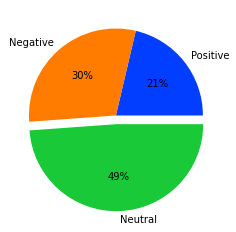

In [25]:
import matplotlib.pyplot as plt
import seaborn
data = [214, 299, 490]
keys = ['Positive', 'Negative', 'Neutral']
palette_color = seaborn.color_palette('bright')
explode = [0, 0, 0.1]
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct='%.0f%%')
plt.show()